<a href="https://colab.research.google.com/github/wakamatsuikuma/scratch-deeplearning/blob/main/Ch4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# coding: utf-8

import sys, os
ｓys.path.append("/content/drive/MyDrive/ゼロからつくるディープラーニング")
ｓys.path.append("/content/drive/MyDrive/ゼロからつくるディープラーニング/dataset")
ｓys.path.append("/content/drive/MyDrive/ゼロからつくるディープラーニング/common")
ｓys.path.append("/content/drive/MyDrive/ゼロからつくるディープラーニング/Ch4")

import numpy as np
from mnist import load_mnist
from PIL import Image
from IPython.display import display
import pickle
from functions import sigmoid, softmax
from two_layer_net import TwoLayerNet


# グーグルコラボなので画像表示はこれ使う
def img_show(img):
    pil_img = Image.fromarray(np.uint8(img))
    display(pil_img)

# ファイルをアップロード
from google.colab import files
uploaded = files.upload()


In [ ]:
"""
２乗和誤差の実装
"""

def sum_squared_error(y, t):
  return 0.5*np.sum((y-t)**2)

t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
y1 = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0, 0.1, 0, 0]
y2 = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0, 0.6, 0, 0]

error1 = sum_squared_error(np.array(y1), np.array(t))
error2 = sum_squared_error(np.array(y2), np.array(t))
print(error1)
print(error2)

0.09750000000000003
0.5975


In [ ]:
"""
交差エントロピー誤差の実装
"""

def cross_entropy_error(y, t):
  delta =1e-7
  return -np.sum(t * np.log(y + delta))

t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
y1 = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0, 0.1, 0, 0]
y2 = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0, 0.6, 0, 0]

error1 = cross_entropy_error(np.array(y1), np.array(t))
error2 = cross_entropy_error(np.array(y2), np.array(t))
print(error1)
print(error2)

0.510825457099338
2.302584092994546


In [ ]:
"""
ミニバッチでの抽出
"""

# データ取得/正解ラベルをone-hot表現で取得
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

print(x_train.shape)
print(t_train.shape)

# ランダムに10枚抜き出す np.random.choice(引数1, 引数2)：0以上引数1未満の中からランダムに引数2個を取得
train_size = x_train.shape[0]
batch_size = 10
batch_mask = np.random.choice(train_size, batch_size)
x_batch = x_train[batch_mask]
t_batch = t_train[batch_mask]

print(batch_mask)

(60000, 784)
(60000, 10)
[49910  7267  5660  4988 29555 30613 57044 18931 26451 38563]


In [ ]:
"""
バッチ対応の交差エントロピー誤差の実装
"""

# 教師データがone-hot表現の場合
def CrossEntropyError_OneHot(y, t):
  if y.ndim() == 1:
    y = y.reshape(1, y.size)
    t = t.reshape(1, t.size)
  
  batch_size = y.shape[0]
  return -np.sum(t * np.log(y + 1e-7)) / batch_size

# 教師データがラベルの場合
def CrossEntropyError(y, t):
  if y.ndim() == 1:
    y = y.reshape(1, y.size)
    t = t.reshape(1, t.size)
  
  batch_size = y.shape[0]
  return -np.sum(np.log(y[np.arrange(batch_size), t] + 1e-7)) / batch_size # y[np.arrange(batch_size), t]：各データの正解ラベルに対するNNの出力結果を取得

In [ ]:
"""
数値微分の実装
"""

# 悪い例
def numerical_diff_badex(f, x):
  h = 1e-50 # 丸め誤差が生じる
  return (f(x + h) - f(x)) / h # 分子が前方差分となっている

# 改善
def numerical_diff(f, x):
  h = 1e-4 # この程度だと良い結果になることが知られている
  return (f(x + h) - f(x-h)) / (2*h) # 分子を中心差分に変更

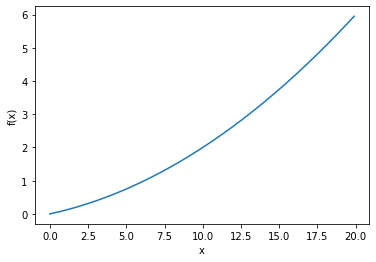

In [ ]:
"""
数値微分の例
"""

import matplotlib.pyplot as plt

def function_1(x):
  return 0.01*x**2 + 0.1*x

x = np.arange(0.0, 20.0, 0.1)
y = function_1(x)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.plot(x, y)
plt.show()

In [ ]:
numerical_diff(function_1, 5)

0.1999999999990898

In [ ]:
numerical_diff_badex(function_1, 5)

0.0

In [ ]:
"""
数値微分による偏微分の実装
"""

import numpy as np

# 関数f, ｘはNumpy配列であるとしてxの各要素に対して数値微分を求める

def numerical_gradient(f, x):
  h = 1e-4
  grad = np.zeros_like(x) # xと同じ形状の配列を生成

  for i_dx in range(x.size):
    tmp_x = x[i_dx]

    # f(x + h)の計算
    x[i_dx] = tmp_x + h
    fxh1 = f(x)

    # f(x - h)の計算
    x[i_dx] = tmp_x - h
    fxh2 = f(x)


    grad[i_dx] = (fxh1-fxh2) / (2*h) #　微分結果を追加、注目している次元以外は引き算で消えているイメージかな？
    x[i_dx] = tmp_x

  return grad


In [ ]:
# 適当な関数で勾配計算

def function_2(x):
  return x[0]**2 + x[1]**2

numerical_gradient(function_2, np.array([3.0, 2.0]))

array([6., 4.])

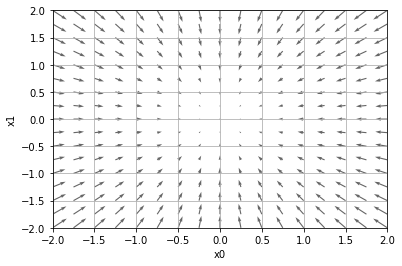

In [ ]:
# coding: utf-8
# cf.http://d.hatena.ne.jp/white_wheels/20100327/p3
import numpy as np
import matplotlib.pylab as plt
from mpl_toolkits.mplot3d import Axes3D


def _numerical_gradient_no_batch(f, x):
    h = 1e-4  # 0.0001
    grad = np.zeros_like(x)
    
    for idx in range(x.size):
        tmp_val = x[idx]
        x[idx] = float(tmp_val) + h
        fxh1 = f(x)  # f(x+h)
        
        x[idx] = tmp_val - h 
        fxh2 = f(x)  # f(x-h)
        grad[idx] = (fxh1 - fxh2) / (2*h)
        
        x[idx] = tmp_val  # 値を元に戻す
        
    return grad


def numerical_gradient(f, X):
    if X.ndim == 1:
        return _numerical_gradient_no_batch(f, X)
    else:
        grad = np.zeros_like(X)
        
        for idx, x in enumerate(X):
            grad[idx] = _numerical_gradient_no_batch(f, x)
        
        return grad


def function_2(x):
    if x.ndim == 1:
        return np.sum(x**2)
    else:
        return np.sum(x**2, axis=1)


def tangent_line(f, x):
    d = numerical_gradient(f, x)
    print(d)
    y = f(x) - d*x
    return lambda t: d*t + y


if __name__ == '__main__':
    x0 = np.arange(-2, 2.5, 0.25)
    x1 = np.arange(-2, 2.5, 0.25)
    X, Y = np.meshgrid(x0, x1)
    
    X = X.flatten()
    Y = Y.flatten()

    grad = numerical_gradient(function_2, np.array([X, Y]).T).T

    plt.figure()
    plt.quiver(X, Y, -grad[0], -grad[1],  angles="xy",color="#666666")
    plt.xlim([-2, 2])
    plt.ylim([-2, 2])
    plt.xlabel('x0')
    plt.ylabel('x1')
    plt.grid()
    plt.draw()
    plt.show()

In [3]:
 """
 勾配降下法の実装
 """
import numpy as np

# まずは勾配計算
def numerical_gradient(f, x):
  h = 1e-4
  grad = np.zeros_like(x) # 入力xと同じ形状の配列を生成

  # 入力xの各次元における勾配を計算
  for id_x in range(x.size):
    tmp_x = x[id_x]

    # f(x + h)の計算
    x[id_x] = tmp_x + h
    fxh1 = f(x)

    # f(x - h)の計算
    x[id_x] = tmp_x - h
    fxh2 = f(x)


    grad[id_x] = (fxh1-fxh2) / (2*h) #　微分結果を追加、注目している次元以外は引き算で消えているイメージかな？
    x[id_x] = tmp_x

  return grad


 # 引数は最適したい関数、　xの初期値、学習率、 繰り返し数（降下回数）
def gradient_descent(f, init_x, lr, step_num=100):
  x = init_x

  # 勾配が小さくなっていく方向に入力xを動かしていく(=更新)
  for i in range(step_num):
    grad = numerical_gradient(f, x)
    x -= lr * grad
    
  return x


In [4]:
# 適当な関数で勾配降下法の計算

def function_2(x):
  return x[0]**2 + x[1]**2

init_x = np.array([-3.0, 4.0])
gradient_descent(function_2, init_x=init_x, lr=0.1, step_num=100)

array([-6.11110793e-10,  8.14814391e-10])

In [ ]:
# 学習率が大きすぎると発散
init_x = np.array([-3.0, 4.0])
gradient_descent(function_2, init_x=init_x, lr=10, step_num=100)

array([-2.58983747e+13, -1.29524862e+12])

In [ ]:
# 学習率が小さすぎると動かない
init_x = np.array([-3.0, 4.0])
gradient_descent(function_2, init_x=init_x, lr=1e-10, step_num=100)

array([-2.99999994,  3.99999992])

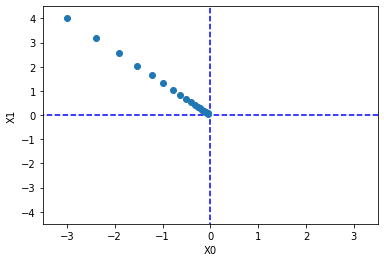

In [ ]:
# coding: utf-8
import numpy as np
import matplotlib.pylab as plt
#from gradient_2d import numerical_gradient


def gradient_descent(f, init_x, lr=0.01, step_num=100):
    x = init_x
    x_history = []

    for i in range(step_num):
        x_history.append( x.copy() )

        grad = numerical_gradient(f, x)
        x -= lr * grad

    return x, np.array(x_history)


def function_2(x):
    return x[0]**2 + x[1]**2

init_x = np.array([-3.0, 4.0])    

lr = 0.1
step_num = 20
x, x_history = gradient_descent(function_2, init_x, lr=lr, step_num=step_num)

plt.plot( [-5, 5], [0,0], '--b')
plt.plot( [0,0], [-5, 5], '--b')
plt.plot(x_history[:,0], x_history[:,1], 'o')

plt.xlim(-3.5, 3.5)
plt.ylim(-4.5, 4.5)
plt.xlabel("X0")
plt.ylabel("X1")
plt.show()


In [19]:
"""
ニューラルネットワークの勾配計算

学習とは、損失関数を重みパラメーターに関して、小さくしていくこと。
　→重みパラメーターに関する勾配を小さくしていけばいい（＝勾配降下法）
ここでは、
入力x=[0.6, 0.9]　　正解ラベルt = [0, 0, 1]　とする。重みwは、２*3行列。(1サンプル、2特徴量、3クラス分類)

1. simplenetというクラスで交差エントロピー誤差による損失関数生成(このクラス内で重みも生成)
2. numerical.gradientクラスで数値微分による生成した重み座標での勾配を計算

"""
# coding: utf-8
import numpy as np
from functions import softmax, cross_entropy_error
from gradient import numerical_gradient

x = np.array([0.6, 0.9])
t = np.array([0, 0, 1])

class simpleNet:
  def __init__(self):
    self.W = np.random.randn(2, 3) # ガウス分布で初期化

  def predict(self, x):
    return np.dot(x, self.W)
  
  def loss(self, x, t):
    z = self.predict(x)
    y = softmax(z)
    loss = cross_entropy_error(y, t)

    return loss

net = simpleNet()
print(net.W) # 重みパラメーター

p = net.predict(x)
print(p) # 予測値

erorr = net.loss(x, t)
print(erorr) # 誤差(損失関数によるxの写像)

def f(W):
  return net.loss(x, t)

print(numerical_gradient(f, net.W)) # 損失関数の勾配



[[ 0.49847477 -0.78661685 -1.68776568]
 [-2.16730245  3.26529913  0.80368615]]
[-1.65148734  2.4667991  -0.28934188]
2.8329233242833487
[[ 0.00904179  0.55565295 -0.56469475]
 [ 0.01356269  0.83347943 -0.84704212]]


In [6]:
"""
学習アルゴリズムの実装
　　　　　2層NNのクラス
   クラスの中身=勾配計算：2層となるようにパラメーター設定→推論値計算→損失関数計算→勾配計算
"""
from functions import *
from gradient import numerical_gradient


class TwoLayerNet:
  # 引数は入力層のニューロン数、隠れ層のニューロン数、出力層のニューロン数
  def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):
    # 辞書型で格納していく。また重みはガウス分布による乱数生成で初期化。バイアスは0で初期化。
    self.params = {}
    self.params["W1"] = weight_init_std * np.random.randn(input_size, hidden_size)
    self.params["b1"] = np.zeros(hidden_size)
    self.params["W2"] = weight_init_std * np.random.randn(hidden_size, output_size)
    self.params["b2"] = np.zeros(output_size)
  

  # 認識(推論)を行う
  def predict(self, x):
    W1, W2 = self.params["W1"], self.params["W2"]
    b1, b2 = self.params["b1"], self.params["b2"]

    # 1層目の出力
    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)

    # 2層目の出力
    a2 = np.dot(z1, W2) + b2
    y = softmax(a2)

    return y
  

  # 損失関数。xが入力、tが正解ラベル
  def loss(self, x, t):
    y = self.predict(x)
        
    return cross_entropy_error(y, t)
  
  # 精度計算
  def accurancy(self, x, t):
    y = self.predict(x)
    y = np.argmax(y, axis=1)
    t = np.argmax(t, axis=1)

    accuracy = np.sum(y == t) / float(x.shape[0]) 

    return accuracy

  # 勾配計算。xが入力、tが正解ラベル
  def numerical_gradient(self, x, t):
    W1, W2 = self.params["W1"], self.params["W2"]
    b1, b2 = self.params["b1"], self.params["b2"]

    loss_W = lambda W: self.loss(x, t) # ここ関数にする必要ある？

    # 各パラメータ行列毎の勾配求めるのに、各パラメータによる最終出力値から計算される損失関数の値を使うイメージがつかない。
    # 偏微分の偏微分みたいな？
    grads = {}
    grads["W1"] = numerical_gradient(loss_W, W1)
    grads["b1"] = numerical_gradient(loss_W, b1)
    grads["W2"] = numerical_gradient(loss_W, W2)
    grads["b2"] = numerical_gradient(loss_W, b2)

    return grads




In [7]:
net = TwoLayerNet(input_size=784, hidden_size=100, output_size=10)
net.params["W1"].shape

(784, 100)

In [8]:
# ダミーデータによる計算
x = np.random.rand(100, 784)
t = np.random.rand(100, 10)

grads = net.numerical_gradient(x, t)

grads["W1"].shape

(784, 100)

In [5]:
"""
ミニバッチ学習の実装
"""

# データの取得
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

# 損失関数の値を1更新ごとに入れていく
train_loss_list = []

# ニューラルネットワークのインスタンス生成
network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

# ハイパーパラメーター設定
iters_num = 10000  # 更新回数
learning_rate = 0.1  # 学習率
batch_size = 100 # バッチサイズ

train_size = x_train.shape[0]

# ミニバッチ学習：ミニバッチの取得→勾配計算→パラメーター更新　を繰り返す
# ミニバッチサイズ100で一回更新ごとにデータ変えてるのが不思議な感じ
for i in range(iters_num):

  # ミニバッチでデータ取得
  batch_mask = np.random.choice(train_size, batch_size, replace=False)
  x_batch = x_train[batch_mask]
  t_batch = t_train[batch_mask]

  # 勾配計算
  # grad = network.numerical_gradient(x_batch, t_batch)
  grad = network.gradient(x_batch, t_batch) # 高速版
  
  # パラメーター更新
  for key in ("W1", "b1", "W2", "b2"):
    network.params[key] -= learning_rate * grad[key]

  # 学習結果の記録
  train_loss_list.append(network.loss(x_batch, t_batch))


network.params

{'W1': array([[-0.01033492, -0.00939375, -0.01003693, ..., -0.00351239,
         -0.00730473, -0.0050939 ],
        [-0.00169399, -0.00928576, -0.00285996, ..., -0.00144613,
         -0.00529977,  0.01064932],
        [-0.01124925, -0.00151471, -0.00206615, ...,  0.01079075,
          0.00140793, -0.00446473],
        ...,
        [ 0.01073216,  0.0024453 ,  0.00290249, ..., -0.01457119,
         -0.00115596, -0.00035587],
        [-0.01800773,  0.0018756 ,  0.01206271, ..., -0.0173565 ,
         -0.01267843,  0.00874619],
        [-0.00810483,  0.00733406, -0.00118644, ...,  0.0073728 ,
         -0.0080755 ,  0.00341118]]),
 'b1': array([-0.02137146,  0.20740928, -0.09741607,  0.00298397, -0.09638128,
         0.02058383, -0.09609793, -0.1479869 ,  0.18140332,  0.0059945 ,
        -0.14956572,  0.0878166 , -0.09787523,  0.02835343,  0.20017642,
         0.13811563,  0.04788395, -0.24494463,  0.04888386,  0.07458991,
        -0.03583418, -0.0897914 , -0.06641094, -0.03848431,  0.015776

train acc, test acc | 0.09736666666666667, 0.0982
train acc, test acc | 0.80065, 0.8033
train acc, test acc | 0.8740833333333333, 0.8757
train acc, test acc | 0.8972166666666667, 0.8988
train acc, test acc | 0.90775, 0.9114
train acc, test acc | 0.91525, 0.917
train acc, test acc | 0.9199, 0.9215
train acc, test acc | 0.9236333333333333, 0.9258
train acc, test acc | 0.9281166666666667, 0.9294
train acc, test acc | 0.9306166666666666, 0.9313
train acc, test acc | 0.9347666666666666, 0.9354
train acc, test acc | 0.9369166666666666, 0.9373
train acc, test acc | 0.93895, 0.9375
train acc, test acc | 0.9416666666666667, 0.941
train acc, test acc | 0.9435833333333333, 0.944
train acc, test acc | 0.94595, 0.9449
train acc, test acc | 0.94785, 0.9464


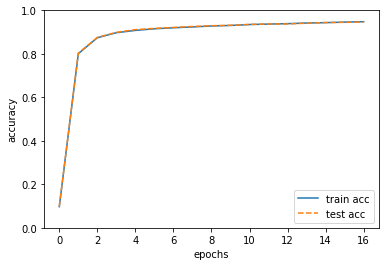

In [8]:
"""
ミニバッチ学習の実装/テストデータに対する精度を1エポックごとに計算し描画
"""

# データの取得
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)


# ニューラルネットワークのインスタンス生成
network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)


# ハイパーパラメーター設定
iters_num = 10000  # 更新回数
learning_rate = 0.1  # 学習率
batch_size = 100 # バッチサイズ


train_loss_list = [] # 損失関数の値を1更新ごとに入れていく
train_size = x_train.shape[0]
test_acc_list = []
train_acc_list = []
iters_per_epoch = max(train_size / batch_size, 1)# 1エポックあたりの繰り返し数


# ミニバッチ学習：ミニバッチの取得→勾配計算→パラメーター更新　を繰り返す
# ミニバッチサイズ100で一回更新ごとにデータ変えてるのが不思議な感じ
for i in range(iters_num):

  # ミニバッチでデータ取得
  batch_mask = np.random.choice(train_size, batch_size, replace=False)
  x_batch = x_train[batch_mask]
  t_batch = t_train[batch_mask]

  # 勾配計算
  # grad = network.numerical_gradient(x_batch, t_batch)
  grad = network.gradient(x_batch, t_batch) # 高速版
  
  # パラメーター更新
  for key in ("W1", "b1", "W2", "b2"):
    network.params[key] -= learning_rate * grad[key]

  # 学習結果の記録
  train_loss_list.append(network.loss(x_batch, t_batch))

  # 1エポックごとに認識精度計算
  if i % iters_per_epoch == 0:
    train_acc = network.accuracy(x_train, t_train)
    test_acc = network.accuracy(x_test, t_test)
    train_acc_list.append(train_acc)
    test_acc_list.append(test_acc)
    print("train acc, test acc | " + str(train_acc) + ", " + str(test_acc))


# グラフの描画
import matplotlib.pyplot as plt
markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, label='train acc')
plt.plot(x, test_acc_list, label='test acc', linestyle='--')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()